# 🟦 1. 프로젝트 개요

### 📝 소개

이 노트북은 Python + Pandas + Seaborn을 활용해 **기초 EDA(탐색적 데이터 분석)** 을 수행하는 프로젝트입니다.
데이터는 seaborn 내장 *Titanic* dataset을 사용하여, 아래 내용을 실습합니다.

* 데이터 구조 이해
* 결측치 분석
* 기초 통계
* 범주형·연속형 시각화
* 인사이트 요약

# 🟦 2. 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 🟦 3. 데이터 불러오기

Seaborn의 Titanic dataset 사용.

In [ ]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 🟦 4. 데이터 기본 정보 확인

## ✔ 4-1. DataFrame 정보

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## ✔ 4-2. 기초 통계량

In [ ]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 🟦 5. 결측치 확인

In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### ✔ 시각화로 보기

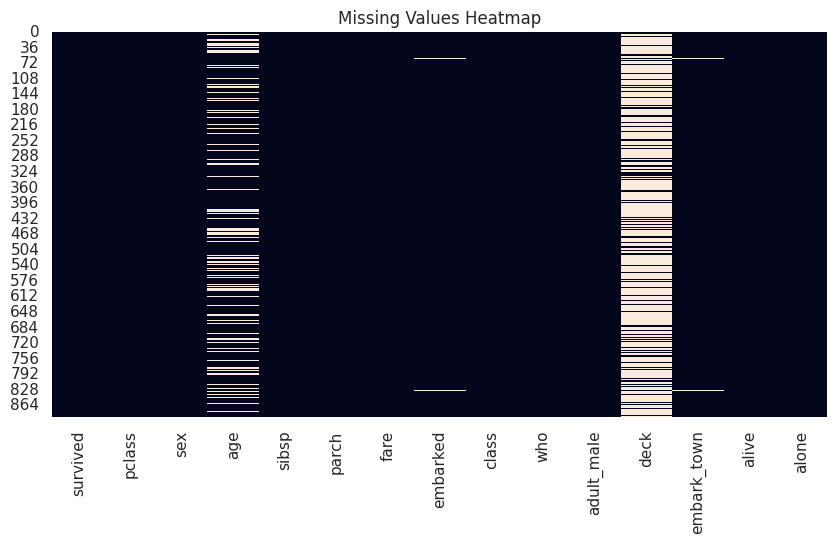

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# 🟦 6. 수치형·범주형 컬럼 분리

In [ ]:
numeric_cols = df.select_dtypes(include=["int", "float"]).columns
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns

numeric_cols, categorical_cols

(Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object'),
 Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
        'alive', 'alone'],
       dtype='object'))

# 🟦 7. 단일 변수 분석 (Univariate Analysis)

## ✔ 7-1. 연속형 변수 히스토그램

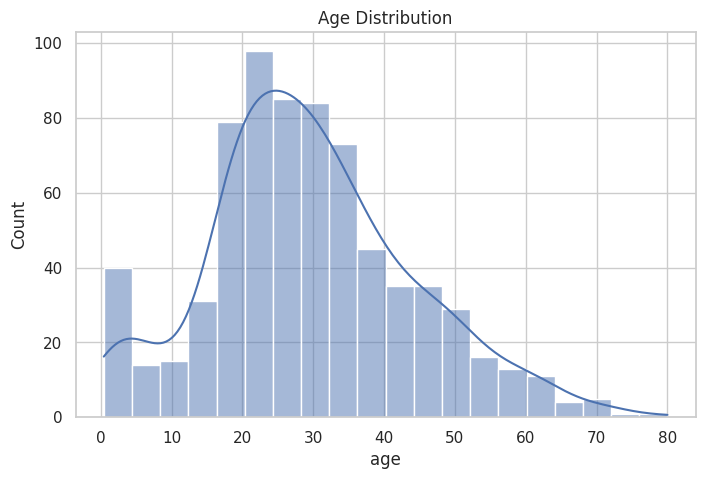

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], kde=True)
plt.title("Age Distribution")
plt.show()

## ✔ 7-2. 범주형 변수 countplot

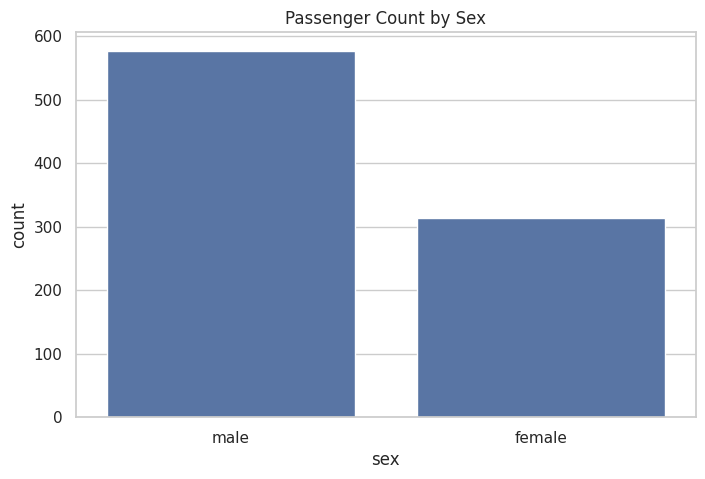

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="sex")
plt.title("Passenger Count by Sex")
plt.show()

# 🟦 8. 이변량 분석 (Bivariate Analysis)

## ✔ 8-1. 성별별 생존률

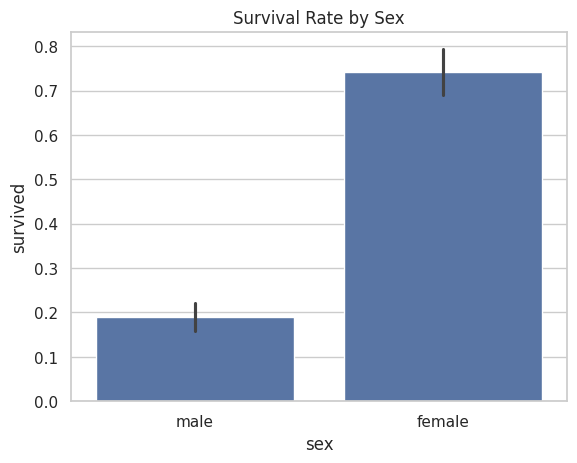

In [ ]:
sns.barplot(data=df, x="sex", y="survived")
plt.title("Survival Rate by Sex")
plt.show()

## ✔ 8-2. 객실 등급별 생존률

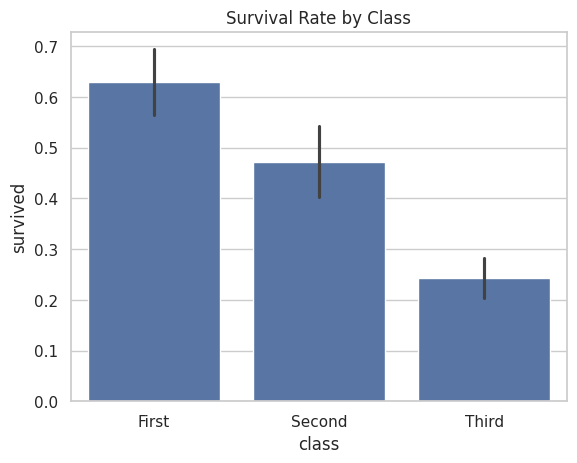

In [ ]:
sns.barplot(data=df, x="class", y="survived")
plt.title("Survival Rate by Class")
plt.show()

## ✔ 8-3. 나이 vs 요금 관계

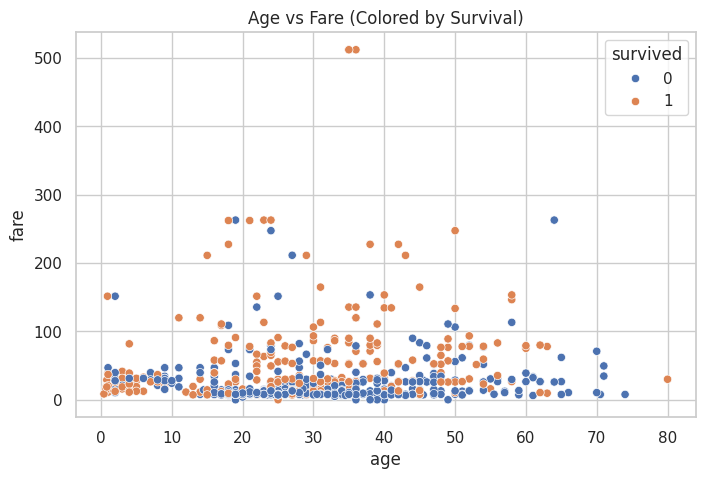

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="age", y="fare", hue="survived")
plt.title("Age vs Fare (Colored by Survival)")
plt.show()

# 🟦 9. 상관관계 분석

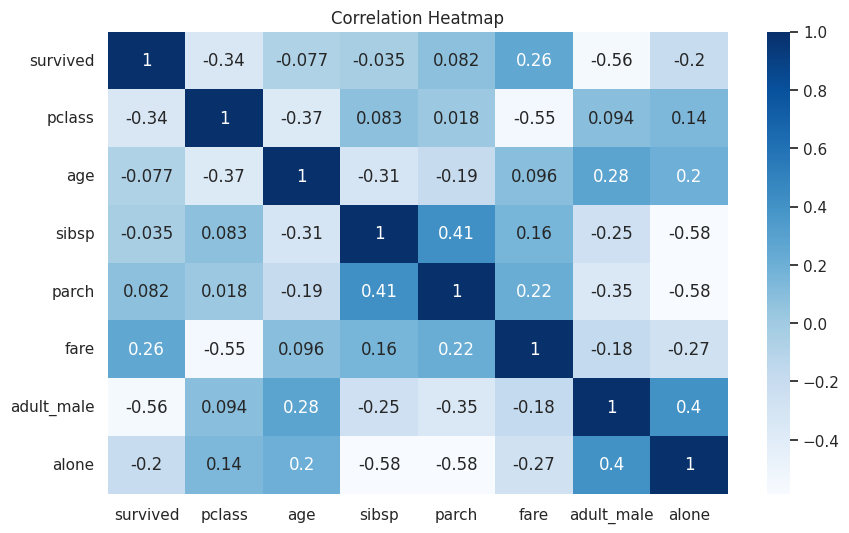

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# 🟦 10. 간단한 데이터 전처리 예시

## ✔ 나이 결측치 평균으로 대체

In [ ]:
df["age"] = df["age"].fillna(df["age"].mean())
df["age"].isnull().sum()

np.int64(0)

## ✔ 불필요한 컬럼 제거 예시

In [ ]:
df_clean = df.drop(columns=["deck"])  # 결측치 많음
df_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


# 🟦 11. 최종 인사이트 정리

아래 셀에 본인이 직접 정리하면 됩니다.

In [ ]:
insights = """
📌 Titanic 데이터 EDA 인사이트 요약

1. 여성 승객의 생존률이 남성보다 훨씬 높게 나타남.
2. 1등석 승객의 생존률이 가장 높고, 3등석 승객의 생존률이 가장 낮음.
3. 요금(fare)은 객실 등급과 생존 여부와 밀접한 관계가 있으며,
   고가 요금을 지불한 승객일수록 생존률이 높은 경향을 보임.
4. 나이(age)는 생존 여부와 큰 상관관계는 없지만,
   특정 연령대(어린이)의 생존률이 다소 높음.
"""

print(insights)


📌 Titanic 데이터 EDA 인사이트 요약

1. 여성 승객의 생존률이 남성보다 훨씬 높게 나타남.
2. 1등석 승객의 생존률이 가장 높고, 3등석 승객의 생존률이 가장 낮음.
3. 요금(fare)은 객실 등급과 생존 여부와 밀접한 관계가 있으며,
   고가 요금을 지불한 승객일수록 생존률이 높은 경향을 보임.
4. 나이(age)는 생존 여부와 큰 상관관계는 없지만,
   특정 연령대(어린이)의 생존률이 다소 높음.



# 🟦 12. 프로젝트 마무리

In [ ]:
print("EDA 프로젝트가 완료되었습니다.")

EDA 프로젝트가 완료되었습니다.
